# Projects in data science: Segmentation

## Predict malignancy of brain tumor
**Exercises**:
1. Load and visualize data from brain_tumor.csv. You'll have to reshape X into a column vector with .reshape(-1,1) from numpy
2. Fit a logistic regression [from sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Plot the probability function.
3. Predict whether a tumor of size 3.46mm and a tumor of size 3.6mm will be cancerous.

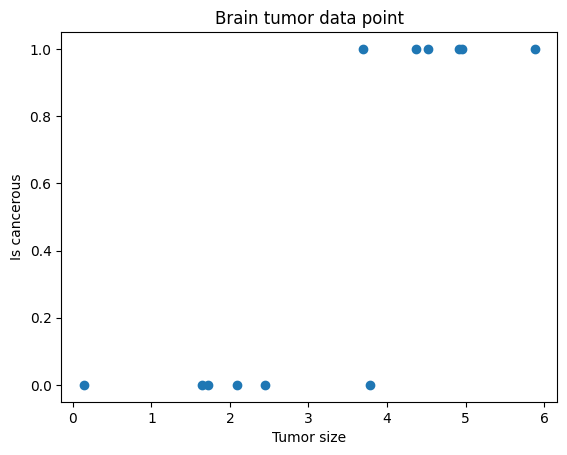

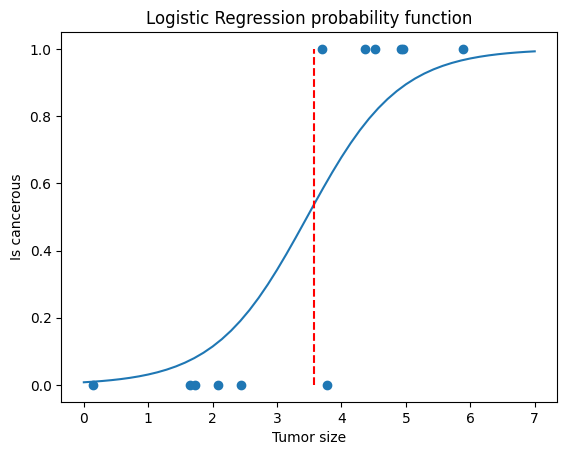

In [1]:
#Your answer
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
#1
data = pd.read_csv("./example_data/brain_tumor.csv")
X = np.array(data["size"]).reshape(-1,1)
y = data["is_cancerous"]
plt.figure()
plt.title("Brain tumor data point")
plt.scatter(data["size"],y)
plt.xlabel("Tumor size")
plt.ylabel("Is cancerous")
plt.show()

#2
logr = LogisticRegression()
logr.fit(X,y)
X_logr = np.linspace(0,7,50)
y_logr = [logr.predict_proba([[x]])[0][1] for x in X_logr]
decision_frontier = X_logr[np.argwhere(np.array(y_logr)>0.5)[0][0]]

plt.figure()
plt.title("Logistic Regression probability function")
plt.scatter(data["size"],y)
plt.plot(X_logr,y_logr)
plt.vlines(decision_frontier,0,1,colors="r",linestyles="dashed")
plt.xlabel("Tumor size")
plt.ylabel("Is cancerous")
plt.show()

#3
prediction = logr.predict([[3.46]])
prediction = logr.predict([[3.6]])


**Your comments**:

## Palmer Penguins classification
We will use the Palmer Penguins dataset to fit a logistic regression using first 2 features and then all the features.

### Load and prepare the data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

p2data = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/1a19e36ba583887a4630b1f821e3a53d5a4ffb76/data-raw/penguins_raw.csv'
penguins_raw = pd.read_csv(p2data)
columns_of_interest = ["Culmen Length (mm)", "Culmen Depth (mm)", 
                       "Flipper Length (mm)", "Body Mass (g)", "Sex"]
#Only keep interesting information
penguins_df = penguins_raw[columns_of_interest]
#Remove missing informations
penguins_df=penguins_df.replace(".", np.nan)
penguins_df=penguins_df.dropna()
penguins_df.head()

#Our features
penguins_data=penguins_df.select_dtypes(np.number)

#Our target
sex = penguins_df.Sex.tolist()
#Transform into a [0,1] vector
sex = [0 if y =='MALE' else 1 for y in sex]
scaler = StandardScaler()
penguins_data_scaled = scaler.fit_transform(penguins_data)

**Exercises:**
1. Split your data into a train and test set
2. Fit a logistic regression on the train set using the first 2 columns ("Culmen Length (mm)" and "Culmen Depth (mm)")
3. [Plot the decision boundaries for 2 features](https://stackoverflow.com/a/28257799)
4. Fit a logistic regression using all the features
5. Compute prediction on the test set

Model accuracy:0.9104477611940298


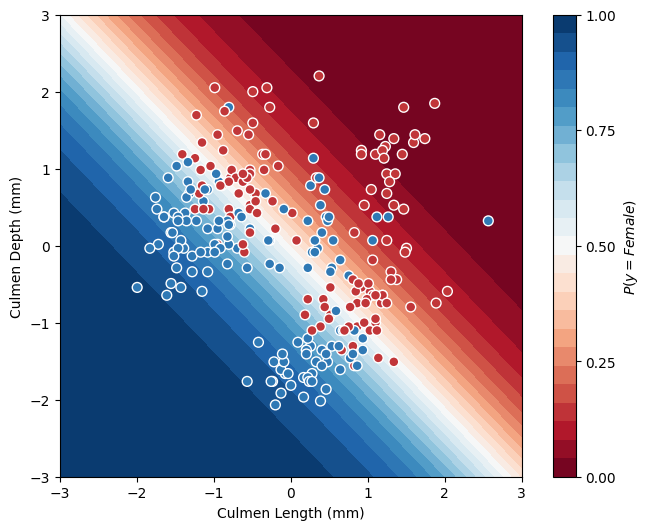

In [3]:
#1
X_train, X_test, y_train, y_test = train_test_split(penguins_data_scaled, sex, test_size=0.2, random_state=1907)

#2
logr = LogisticRegression()
logr.fit(X_train[:,:2],y_train)

#3
xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = logr.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = Female)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train[:,0], X_train[:,1], c=y_train, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-3, 3), ylim=(-3, 3),
       xlabel="Culmen Length (mm)", ylabel="Culmen Depth (mm)")

#4
logr = LogisticRegression()
logr.fit(X_train,y_train)

#5
print(f"Model accuracy:{logr.score(X_test,y_test)}")

**Your comments:**

## Implement the logistic regression (bonus)
We will implement logistic regression to classify iris plants

**Exercises**:
1. [Load the iris dataset from sklearn](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
2. Select two classes to create a binary classification problem
3. Split the dataset into a training and a testing set
4. Initialize weights (w) and bias (b) at 0
5. Implement the sigmoid function
6. In function `model_optimize`: implement a function that computes the cost and gradients
7. In function `fit` : implement the function to update the weights
8. Fit your model with the training set and compute the prediction on the test set 

In [4]:
#Your answer
#1
from sklearn import datasets
iris = datasets.load_iris()

#4-6
class MyLogisticRegression():
    def __init__(self) -> None:
        self.w = None
        self.b = None
    
    #3
    def weight_init(self,n_features):
        self.w = np.zeros((1,n_features))
        self.b = 0
    #4
    def sigmoid(self,value):
        return 1/(1+np.exp(-value))
    
    #5
    def model_optimize(self,X,y):
        #Number of data point
        m = X.shape[0]
        y_T = y.T

        #Predict
        linear_result = np.dot(self.w,X.T)+self.b
        sigmoid_result = self.sigmoid(linear_result)
        #Compute binary cross-entropy cost function
        cost = (-1/m)*np.sum((y_T*np.log(sigmoid_result))+((1-y_T)*np.log(1-sigmoid_result)))

        #Compute gradients
        grad_w = (1/m)*(np.dot(X.T, (sigmoid_result-y.T).T))
        grad_b = (1/m)*(np.sum(sigmoid_result-y.T))
        grads = [grad_w,grad_b]
        
        return cost,grads

    def fit(self,X,y,nb_iteration,learning_rate):
        for n in range(nb_iteration):
            #Get gradients and costs
            cost,grads = self.model_optimize(X,y)
            grad_w = grads[0]
            grad_b = grads[1]

            self.w = self.w - (learning_rate*grad_w).T
            self.b = self.b - (learning_rate*grad_b)

    def predict_proba(self,values):
        linear_result = np.dot(self.w,values.T)+self.b
        sigmoid_result = self.sigmoid(linear_result)
        return sigmoid_result

    def predict(self,values):
        preds = []
        probas = self.predict_proba(values)
        for proba in probas[0]:
            if proba > 0.5:
                preds.append(1)
            else:
                preds.append(0)
        return preds


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X= iris["data"]
y = [y if y == 1 else 0 for y in iris["target"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1907)


X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [6]:
my_lgr = MyLogisticRegression()
my_lgr.weight_init(X_train_norm.shape[1])
my_lgr.fit(X_train_norm,np.array(y_train),4000,1e-2)

In [7]:
preds = my_lgr.predict(X_test_norm)
nb_good_pred = 0
for pred,gt in zip(preds,y_test):
    if pred == gt:
        nb_good_pred += 1
print(nb_good_pred,len(preds),nb_good_pred/len(preds))

21 30 0.7


**Your comments**: